# Job prospects after graduation 

The aim of this project is to visually explore the variations in salary for university graduates of universities in the United States of America (US). 
The primary aim is to use quantitative data to determine which is the most efficient major from different metrics. 

This project is essentially concerned with visualizing the data, and can be seen as a first step towards a more ambitiou analysis which could provide, for instance, a model to select the optimal majo for a student given their academic strengths and weaknesses and their objectives (eg maximizing the probability to get a job, working in a particular field, or maximizing expected earnings). 

## The dataset

The dataset, `recent-grads.csv`, was downloaded from [FiveThirtyEight's GitHub repository](https://github.com/fivethirtyeight/data/tree/master/college-majors) on 20/10/2019. 
The data is originally from American Community Survey 2010-2012 Public Use Microdata Series, available [here](http://www.census.gov/programs-surveys/acs/data/pums.html), with documentation [here](http://www.census.gov/programs-surveys/acs/technical-documentation/pums.html). 
It contains a breakdown of basic earnings and labor force information for students who graduated from US colleges between 2010 and 2012. 

Each row represents a different major. 
The columns are: 
* `Rank`: rank by median earnings, 
* `Major_code`: major code (FO1DP in ACS PUMS),
* `Major`: description of the major,
* `Major_category`: category of the major, 
* `Total`: total number of people with this major, 
* `Sample_size`: sample size of full-time, year-round workers,
* `Men`: number of male graduates, 
* `Women`: number of female graduates, 
* `ShareWomen`: share of women in the total,
* `Employed`: number of employed people,
* `Full_time`: number of people working 35 hours or more per week,
* `Part_time`: number of people working less than 35 hours per week,
* `Full_time_year_round`: numnber of people employed for at least 50 weeks and working 35 hours or more per week, 
* `Unemployed`: number of unemployed people, 
* `Unemployement_rate`: unemployment rate, 
* `Median`: median earnings in US dollars (USD) of full-time, year-round workers, 
* `P25th`: 25th percentile of earnings of full-time, year-round workers,
* `P75th`: 75th percentile of earnings of full-time, year-round workers,
* `College_jobs`: number of people with jobs requiring a college degree, 
* `Non_college_jobs`: number of people with jobs requiring no college degree, 
* `Low_wage_jobs`: number of people in low-wage service jobs.

As this project is mostly concerned with data visualisation, we will make extensive use of the Pandas and Matplotlib libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Import the data and view the first few lines:

In [2]:
recent_grads = pd.read_csv('../Data/recent-grads.csv')
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Then the last few lines:

In [3]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


We then use the `describe` function to determine the main properties of each numeric column:

In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We notice that the `Total`, `Men`, `Women`, and `ShareWomen` columns are missing one value. 
Let us delete the corresponding row using Pandas' `dropna` function.

In [5]:
recent_grads = recent_grads.dropna()

## Data exploration

### Scatter plots

Let us explore the data by doing a few scatter plots. 
We define the function `scatter_plot` taking two column names and returning a scatter plot of the second vs the first. 
To better visualize plots with a high density, we complement them with hexagonal bin plots.

In [6]:
def scatter_plot(column_x, column_y):
    '''
    scatter plot of column_y vs column_x for the recent_grads dataframe
    
    column_x: string
    column_y: string
    '''
    ax = recent_grads.plot(x = column_x, y = column_y, kind = 'scatter', 
                           title = '{} vs {}'.format(column_x, column_y),
                           grid = True)
    plt.show()
    
def hex_plot(column_x, column_y, gridsize=20):
    '''
    hexagonal bin plot of column_y vs column_x for the recent_grads dataframe
    
    column_x: string
    column_y: string
    gridsize: int
    '''
    ax = recent_grads.plot(x = column_x, y = column_y, kind = 'hexbin',
                           title = '{} vs {}'.format(column_x, column_y),
                           gridsize=gridsize, 
                           sharex=False) # set sharex=False to prevent a bug 
                                         # which erases the x label
    plt.show()

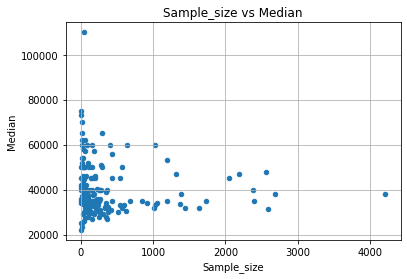

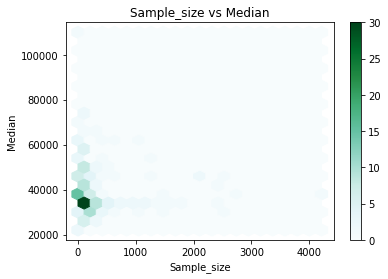

In [7]:
scatter_plot('Sample_size', 'Median')
hex_plot('Sample_size', 'Median')

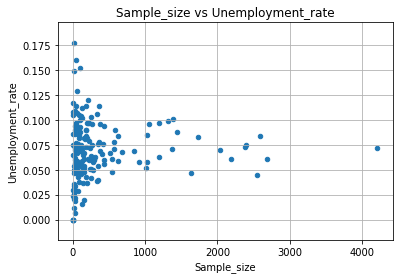

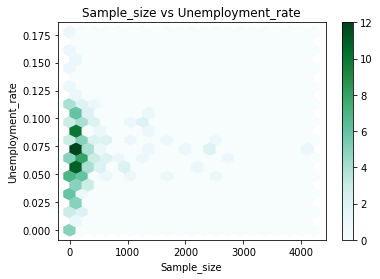

In [8]:
scatter_plot('Sample_size', 'Unemployment_rate')
hex_plot('Sample_size', 'Unemployment_rate')

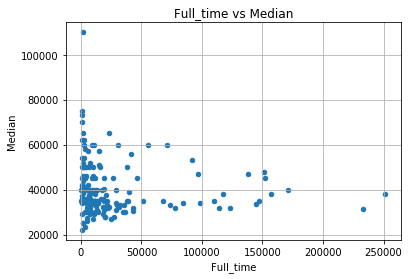

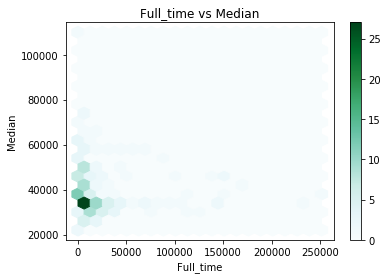

In [9]:
scatter_plot('Full_time', 'Median')
hex_plot('Full_time', 'Median')

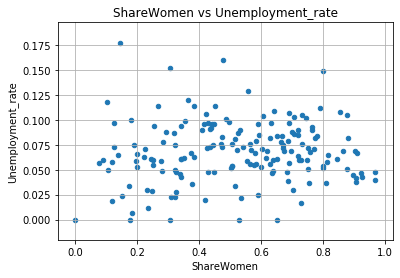

In [10]:
scatter_plot('ShareWomen', 'Unemployment_rate')

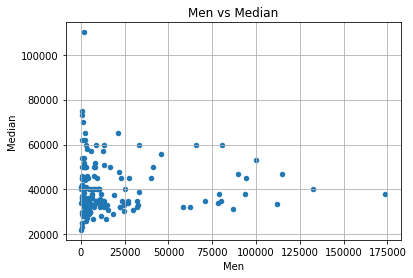

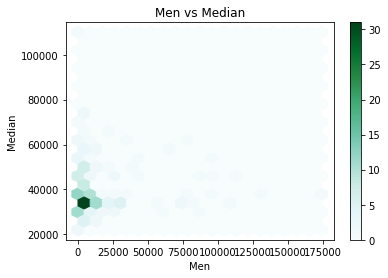

In [11]:
scatter_plot('Men', 'Median')
hex_plot('Men', 'Median')

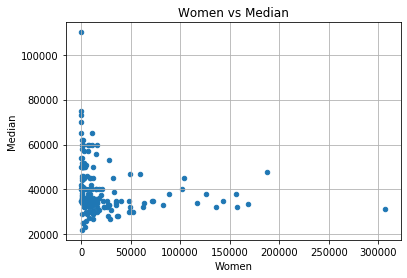

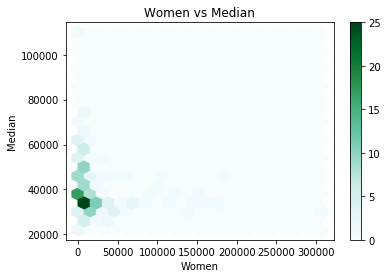

In [12]:
scatter_plot('Women', 'Median')
hex_plot('Women', 'Median')

From these plots, it seems that:
* Students from majors with a larger sample size do not tend to make more money than the others.
* People who graduated with majors having a lot of female students tend to make less money than those with majors having a lot of male students.
* The median salary tends to decrease when the number of full-time employees increases.

### Histograms and box plots

We now show some histograms and box plots to visualize the distribution of values in relevent columns.

In [13]:
def histo_and_box(column, bins=10, range=None):
    '''
    histogram and box plot of the column 'column' for the recent_grads dataframe
    
    column: string
    bins: int 
    range: doublet of ints or floats, or None
    '''
    
    fig = plt.figure()
    ax1 = recent_grads[column].hist(bins=bins, range=range)
    ax1.set_title(column)
    size_fig = fig.get_size_inches()
    plt.show()

    ax2 = recent_grads[column].plot.box(vert=False, figsize = size_fig*(1,0.3), widths=[0.75])
    ax2.set_yticks([])
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    plt.show()

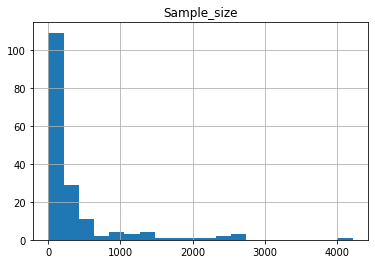

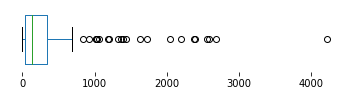

In [14]:
histo_and_box('Sample_size', 20)

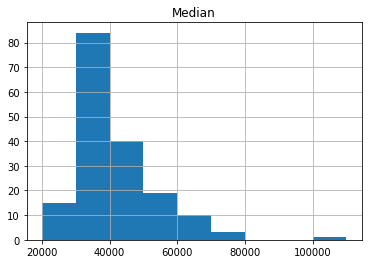

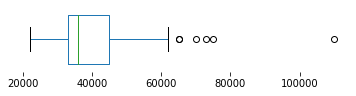

In [15]:
histo_and_box('Median', bins=9, range=(20000,110000))

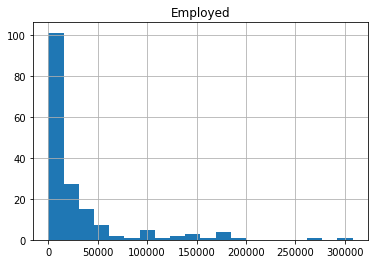

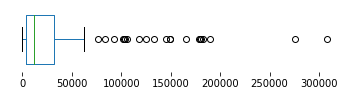

In [16]:
histo_and_box('Employed', 20)

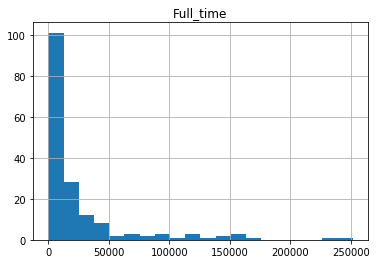

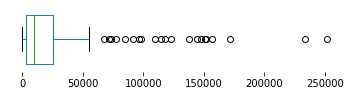

In [17]:
histo_and_box('Full_time', 20)

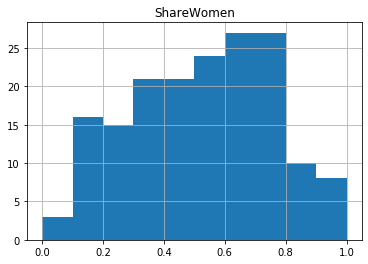

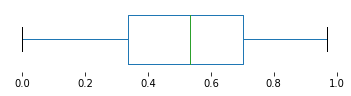

In [18]:
histo_and_box('ShareWomen',range=(0,1))

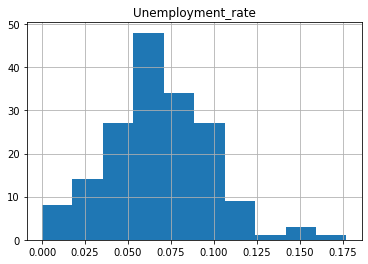

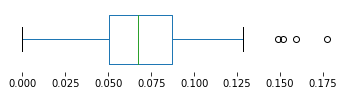

In [19]:
histo_and_box('Unemployment_rate')

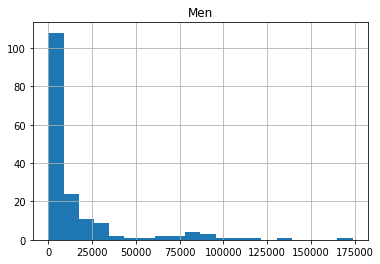

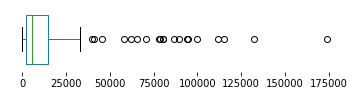

In [20]:
histo_and_box('Men',20)

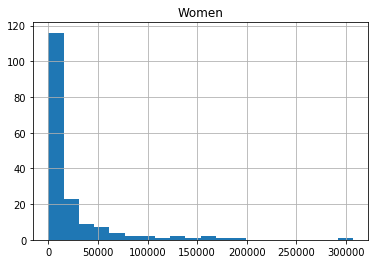

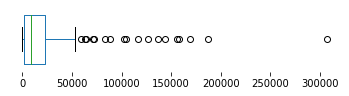

In [21]:
histo_and_box('Women',20)

From these plots, it seems that:
* Slightly less than half of majors have more men than women. 
* Approximately half of majors have between 30\% and 70\% women.
* Three majors have less than 10% of women, and eight have less than 10% men.
* The most common median salary range is \\$30000 to \\$40000, with a median close to \\$35000.
* The most common unemployment rate range is 0.05 to 0.075, with half of majors leading to an unemployment rate between 0.05 and 0.08.
* The columns containing numbers of individuals (`Sample_size`, `Employed`, `Men`, `Full_time`, and `Women`) have more than 10 outliers each with significantly larger values than the median, while the other columns have 5 or less outliers.

### Scatter Matrix Plots

To get a better idea of the relations between the values in different columns, let us show some scatter matrix plots. 
We will use the `scatter_matrix` function from the `pandas.plotting` module.
We also show correlation matrices using `seaborn` to get a numerical estimate of the correlations between the represented variables.

In [22]:
from pandas.plotting import scatter_matrix
import seaborn as sns

def scatter_matrix_and_corr_map(l_columns, figsize=(6,6)):
    '''
    plot a scatter matrix and correlation map for the columns in l_columns of
    the 'recent_grads' dataset
    
    l_columns: list of strings
    figsize: doublet of integers
    '''
    scatter_matrix(recent_grads[l_columns], figsize=figsize)
    plt.show()
    corr = recent_grads[l_columns].corr()
    sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', square=True, annot=True)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

We first visualize the relation between the `Sample_size` and `Median` columns: 

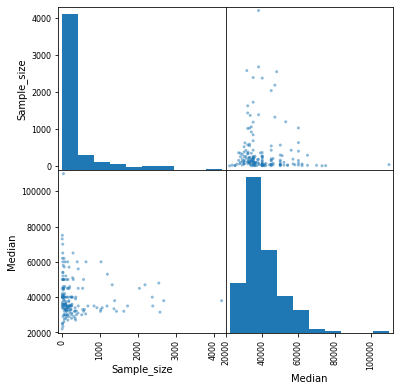

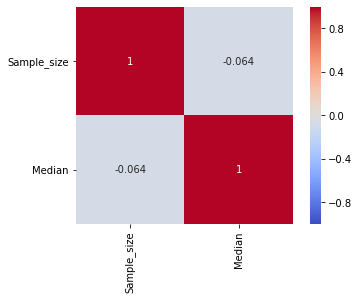

In [23]:
scatter_matrix_and_corr_map(['Sample_size', 'Median'])

There seems to be no significant correlation between them. 
Let us now add the `Unemployment_rate` column: 

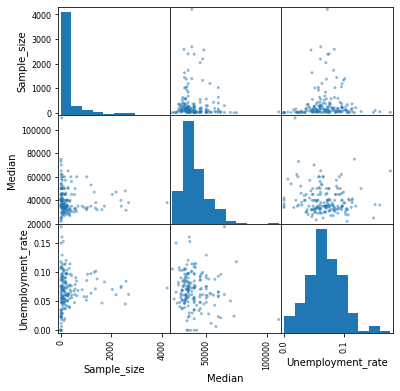

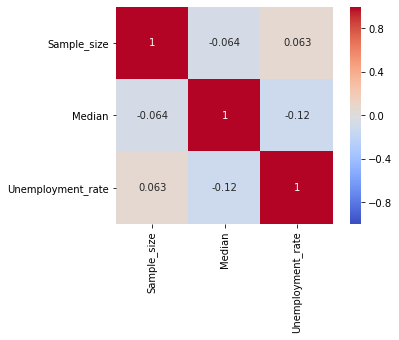

In [24]:
scatter_matrix_and_corr_map(['Sample_size', 'Median', 'Unemployment_rate'])

There seems to be no clear relation between any two of these variables, although we notice a small negative correlation between the median salary and unemployment rate. 
Let us do the same for the `Men` and `Women` columns to see if the same majors are popular among them.

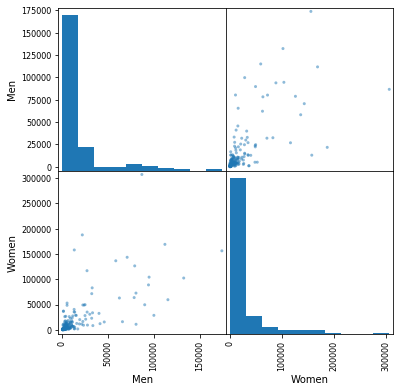

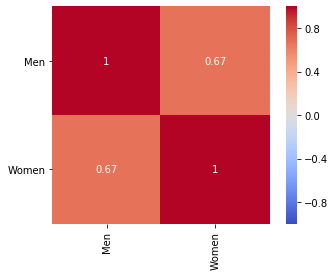

In [25]:
scatter_matrix_and_corr_map(['Men', 'Women'])

There is a significant correlation between these two columns. 
This indicates that **majors which are popular among one gender tend to also be popular among the other**.

To see the relation between the gender distribution and median earnings, let us plot the scatter matrix and correlation map for the `ShareWomen` and `Median` columns.

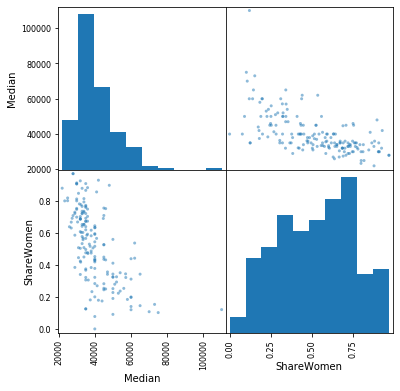

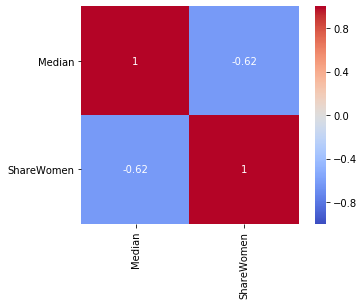

In [26]:
scatter_matrix_and_corr_map(['Median', 'ShareWomen'])

There is a significant negative correlations between the two variables, indicating that **majors with more women tend to lead to lower earnings**. 

Let us do the same for the `Full_time` and `Median` columns.

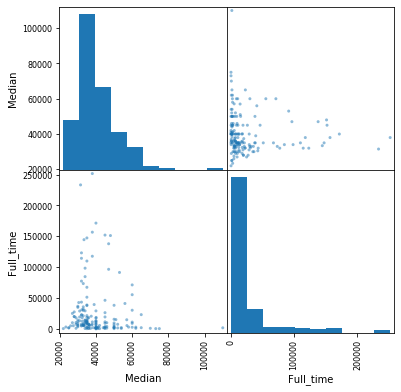

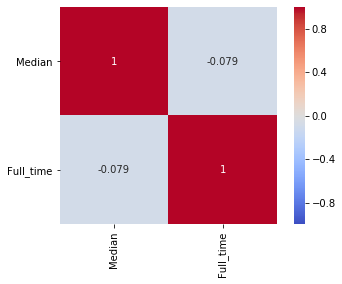

In [27]:
scatter_matrix_and_corr_map(['Median', 'Full_time'])

There is **no significant correlation between these variables**. 

Finally, let us do the same for the `Total` and `Median` columns.

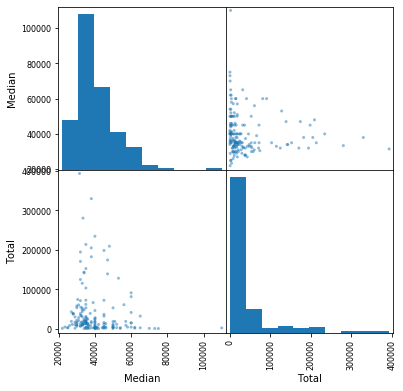

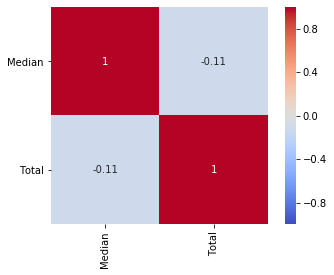

In [28]:
scatter_matrix_and_corr_map(['Median', 'Total'])

There is a very small negative correlation, which may well not be significant.

### Bar plots

Let us further explore the dataset by plotting a few bar plots. 
We first compare the number of men and women in the first and last 10 rows. 
(Rows are ordered by median earnings, with the first rows corresponding to the highest earnings.)

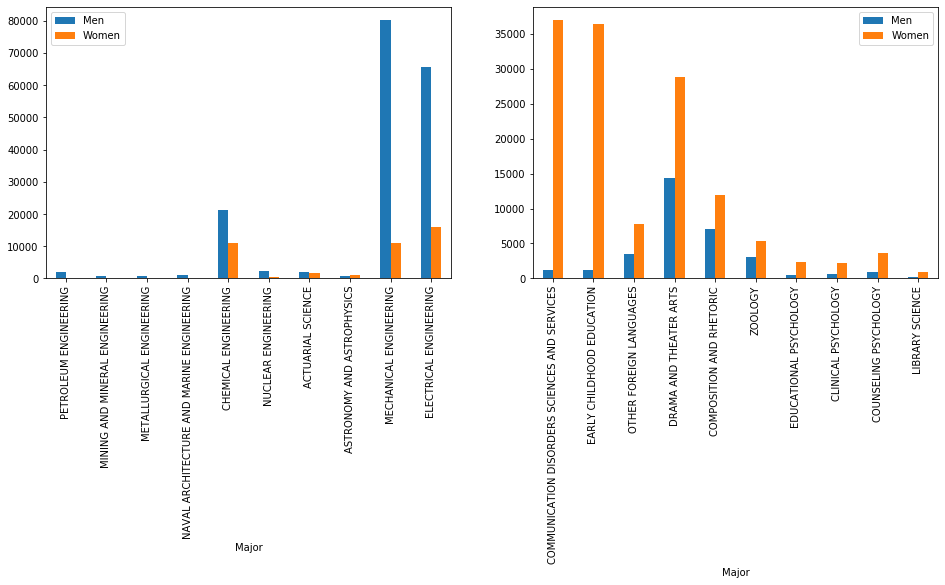

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
recent_grads[:10].plot.bar(x='Major', y=['Men','Women'], ax=axes[0])
recent_grads[-10:].plot.bar(x='Major', y=['Men','Women'], ax=axes[1])
plt.show()

We notice that **the 10 majors leading to the highest median salaries have significantly more men than women, while the 10 majors leading to the lowest median salaries have significantly more women than men**.

Let us now plot the unemployment rate for the first and last 10 rows.

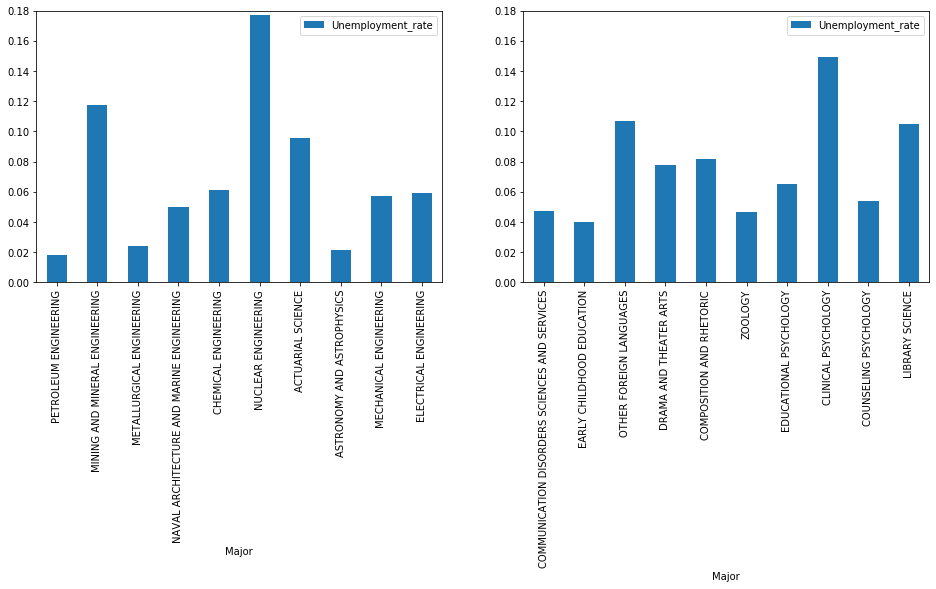

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
axes[0].set_ylim(0,0.18) # to ensure the two plots are on the same scale
axes[1].set_ylim(0,0.18)
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', ax=axes[0])
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', ax=axes[1])
plt.show()

There seems to be no significant difference in the unemplyment rate between the first and last ten rows. 
To check this more precisely, let us print the averages and standard errors.

In [31]:
first_ten_ave = recent_grads['Unemployment_rate'][:10].mean()
# sample standard error: standard deviation / sqrt(number of elements - 1)
first_ten_ste = recent_grads['Unemployment_rate'][:10].std() / 3 

last_ten_ave = recent_grads['Unemployment_rate'][-10:].mean()
last_ten_ste = recent_grads['Unemployment_rate'][-10:].std() / 3 

phrase = 'Average unemployment rate for the {} 10 lines: {:.3f} ± {:.3f}'
print(phrase.format('first', first_ten_ave, first_ten_ste))
print(phrase.format('last', last_ten_ave, last_ten_ste))

# compute the z-score for the difference
from math import sqrt
z_score = (last_ten_ave - first_ten_ave) / sqrt(first_ten_ste**2 + last_ten_ste**2)
print('z-score for the difference: {:.2f}'.format(z_score))

Average unemployment rate for the first 10 lines: 0.068 ± 0.017
Average unemployment rate for the last 10 lines: 0.077 ± 0.012
z-score for the difference: 0.45


The difference between the two mean values has a z-score smaller than 0.5. 
It thus does not seem statistically significant. 
We conclude that, **although the last 10 majors lead to significantly lower median earnings than the first 10 ones, their students do not have significantly higher chances of being unemployed**.

### Statistical significance of the correlations

We now want to estimate whether the correlation coefficients computed above are statistically significant. 
To this end, we compute their uncertainty using a bootstrap method implemented in the library `correlation.so`. 
(The code below should work on Linux. 
On other operating systems, the file `correlation.c` should be compiled as a shared library and the extension `.so` in the cell below replaced by the relevent one.) 
The bootstrap method used to compute the error involves a (pseudo-)random reshufling of the rows (with replacements). 
Results will thus (slightly) differ from one run to another.

In [32]:
import ctypes as ct
import numpy as np

# C library with the bootstrap method
libc = ct.CDLL('../C/correlation.so')

# types of the arguments and return value for the function to calculate the 
# correlation coefficient
libc.corr.argtypes = [np.ctypeslib.ndpointer(dtype='double'), 
                      np.ctypeslib.ndpointer(dtype='double'), 
                      ct.c_int]
libc.corr.restype = ct.c_double

# types of the arguments and return value for the function to calculate the 
# standard deviation of the correlation coefficient
libc.std_corr.argtypes = [np.ctypeslib.ndpointer(dtype='double'), 
                          np.ctypeslib.ndpointer(dtype='double'), 
                          ct.c_int, 
                          ct.c_int]
libc.std_corr.restype = ct.c_double

# Python wrapper: correlation coefficient
def corr_coeff(x,y):
    '''
    Computes the correlation coefficient between x and y.
    If they have different lengths, the longer array is truncated.
    
    return type: float
    
    x: numpy array of float64
    y: numpy array of float64
    '''
    length = min([len(x), len(y)])
    return libc.corr(x, y, length)

# Python wrapper: standard deviation of the correlation coefficient
def std_corr_coeff(x,y):
    '''
    Computes the standard deviation for the correlation coefficient between 
    x and y.
    If they have different lengths, the longer array is truncated.
    
    return type: float
    
    x: numpy array of float64
    y: numpy array of float64
    '''
    length = min([len(x), len(y)])
    return libc.std_corr(x, y, length, length)

def corr_and_error(dframe, column1, column2):
    '''
    Computes the correlation coefficient between the values in columns column1 
    and column2 of the dataframe dframe and its standard deviation.
    The two columns are assumed to contain numeric values only.
    
    dframe: pandas dataframe
    column1: string
    column2: string
    '''
    x = np.array(dframe[column1], dtype='float64')
    y = np.array(dframe[column2], dtype='float64')
    return corr_coeff(x,y), std_corr_coeff(x,y)

# function to print the result in a self-explanatory way
def print_corr_and_error(dframe, column1, column2):
    phrase = 'The correlation coefficient between columns {} and {} is {:.2g} ± {:.2g}.'
    corr, std_corr = corr_and_error(dframe, column1, column2)
    print(phrase.format(column1, column2, corr, std_corr))

We now use the function `print_corr_and_error` to determine which correlations are statistically significant. 
We will consider that *a correlation is significant if the correlation coefficient is larger than three times its standard deviation in absolute value*.

In [33]:
print_corr_and_error(recent_grads, 'Sample_size', 'Median')
print_corr_and_error(recent_grads, 'Sample_size','Unemployment_rate')
print_corr_and_error(recent_grads, 'Median','Unemployment_rate')
print_corr_and_error(recent_grads, 'Men', 'Women')
print_corr_and_error(recent_grads,'Median', 'ShareWomen')
print_corr_and_error(recent_grads,'Median', 'Full_time')
print_corr_and_error(recent_grads,'Median', 'Total')

The correlation coefficient between columns Sample_size and Median is -0.064 ± 0.044.
The correlation coefficient between columns Sample_size and Unemployment_rate is 0.063 ± 0.051.
The correlation coefficient between columns Median and Unemployment_rate is -0.12 ± 0.1.
The correlation coefficient between columns Men and Women is 0.67 ± 0.061.
The correlation coefficient between columns Median and ShareWomen is -0.62 ± 0.042.
The correlation coefficient between columns Median and Full_time is -0.079 ± 0.045.
The correlation coefficient between columns Median and Total is -0.11 ± 0.043.


We ran the above cell several times to make sure the variations in the values of the standard deviations do not change the results.
According to the above definition, there is 
* **a significant positive correlation between the numbers of men and women in each major**,
* **a significant negative correlation between the share of women and the median earnings**.

### Full correlation map

To see whether there are correlations we have missed, let us show correlation map for all numeric columns. 
We show only the correlations whoose absolute values are larger than a threshold, chosen as 0.5.

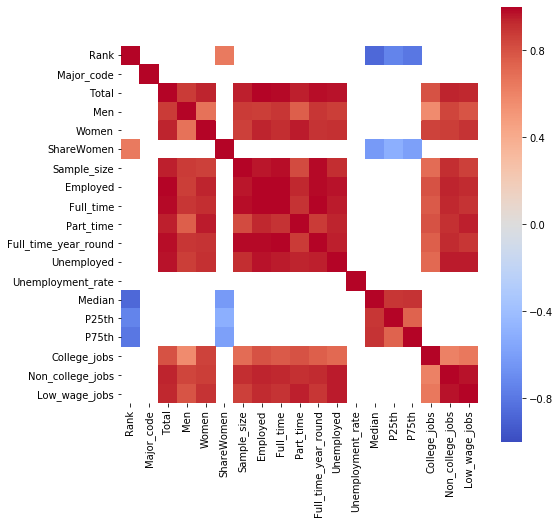

In [34]:
threshold = 0.5
corr = recent_grads.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr[(corr > threshold) | (corr < -threshold)], vmin=-1, vmax=1, cmap='coolwarm', square=True, annot=False)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

This map indicates that: 
* The columns representing numbers of people, *i.e.*,
`Total`,
`Men`,
`Women`,
`Sample_size`, 
`Employed`, 
`Full_time`, 
`Part_time`, 
`Full_time_year_round`, 
`Unemployed`, 
`College_jobs`, 
`Non_college_jobs`,
and `Low_wage_jobs`
have a signifiant positive correlation with each others. 
This was expected, as as increas ein the total number of graduates will, everything else being equal, increase values in all of them.
* The three colomns pertaining to the earnings, *i.e.*, 
`Median`, 
`P25th`,
and `P75th`
have a signifiant positive correlation with each others. 
This indicates that the 25\% lowest and highest earnings both increase when the median does.
* There is a significant negative correlation between the `Rank` and `Median` columns (which was expected from the definition of the former), as well as between the `Rank` and `P25th` and `P75th` columns.
* The column `ShareWomen` has a positive correlation with `Rank` and a negative correlation with `Median`, `P25th`, and `P75th`, in line with the above findings.

## Finding the “best” majors

Finally, we want to determine which majors offer the best prospects to their students. 
There is no unique answer to this question, as different metrics will yield different results. 
We shall thus approach it through several angles. 


### Unemployment rate

The first metric we will use is the unemployment rate. 

In [35]:
n_best = 10 # number of majors to be printed
best_majors_unemployment_rate = recent_grads[['Major', 'Unemployment_rate']].sort_values(by=['Unemployment_rate']).iloc[:n_best].reset_index(drop=True)
best_majors_unemployment_rate['Major'] = best_majors_unemployment_rate['Major'].apply(str.title)
best_majors_unemployment_rate

,Major,Unemployment_rate
0,Educational Administration And Supervision,0.000000
1,Military Technologies,0.000000
2,Botany,0.000000
3,Mathematics And Computer Science,0.000000
4,Soil Science,0.000000
5,Engineering Mechanics Physics And Science,0.006334
6,Court Reporting,0.011690
7,Mathematics Teacher Education,0.016203
8,Petroleum Engineering,0.018381
9,General Agriculture,0.019642


The 5 majors with lowest unemployment rates (equal to 0) are Educational Administration And Supervision, Military Technologies, Botany, Mathematics And Computer Science, and Soil Science.

### Median earnings

Let us now do the same with the median earnings. 
In principle, all we have to do is to take the first rows of the dataframe. 
To cover for any potential error in the labelling of the rank, we will order it explicitly by the `Median` column.

In [36]:
best_majors_median = recent_grads[['Major', 'Median']].sort_values(by=['Median'], ascending=False).iloc[:n_best].reset_index(drop=True)
best_majors_median['Major'] = best_majors_median['Major'].apply(str.title)
best_majors_median

,Major,Median
0,Petroleum Engineering,110000
1,Mining And Mineral Engineering,75000
2,Metallurgical Engineering,73000
3,Naval Architecture And Marine Engineering,70000
4,Chemical Engineering,65000
5,Nuclear Engineering,65000
6,Actuarial Science,62000
7,Astronomy And Astrophysics,62000
8,Computer Engineering,60000
9,Materials Science,60000


The six majors leading to highest median earnings are all about engineering: Petroleum Engineering, Mining And Mineral Engineering, Metallurgical Engineering, Naval Architecture And Marine Engineering, Chemical Engineering, and Nuclear Engineering. 
*Notice that only Petroleum Engineering is in the top 10 for both the unemployment rate and median earning, making it a potentially very attractive major.*

# Fraction of College jobs

Our third metric is the fraction of jobs requiring a colege degree.

In [37]:
best_majors_college_job = pd.concat([recent_grads['Major'], recent_grads['College_jobs'] / (recent_grads['College_jobs'] + recent_grads['Non_college_jobs'])], axis=1)
best_majors_college_job.columns = ['Major', 'Fraction_college_jobs']
best_majors_college_job = best_majors_college_job.sort_values('Fraction_college_jobs', ascending=False).reset_index(drop=True).head(n_best)
best_majors_college_job['Major'] = best_majors_college_job['Major'].str.title()
best_majors_college_job

,Major,Fraction_college_jobs
0,Geological And Geophysical Engineering,0.909256
1,Mathematics And Computer Science,0.870906
2,Materials Science,0.870401
3,Materials Engineering And Materials Science,0.862365
4,Nursing,0.852938
5,Actuarial Science,0.849183
6,Teacher Education: Multiple Levels,0.846716
7,Mathematics Teacher Education,0.844036
8,Special Needs Education,0.841673
9,Naval Architecture And Marine Engineering,0.838352


The five majors leading to the highest fraction of jobs requiring a college degree are Geological And Geophysical Engineering, Mathematics And Computer Science, Materials Science, Materials Engineering And Materials Science, and Nursing. 
*Notice that Mathematics And Computer Science is also one of the majors with no uneployment rate, making it potentially very attractive.*

## Prospects for engineering students

Finally, we want to see if studying engineering give students better professional prospects. 
To this end, we first create a column `engineering` containing 1 if the major title contains “engineering” and 0 otherwise.

In [38]:
def contains_engineering(st):
    '''
    Returns 1 if the string st contains 'ENGINEERING' and 0 otherwise
    '''
    return int(st.find('ENGINEERING') >= 0)

recent_grads['Engineering'] = recent_grads['Major'].apply(contains_engineering)
recent_grads.head(20)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Engineering
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,1
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,1
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,1
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,1
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,1
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,1449,400,0.177226,65000,50000,102000,1142,657,244,1
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,2482,308,0.095652,62000,53000,72000,1768,314,259,0
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,827,33,0.021167,62000,31500,109000,972,500,220,0
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,54639,4650,0.057342,60000,48000,70000,52844,16384,3253,1
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,41413,3895,0.059174,60000,45000,72000,45829,10874,3170,1


We then compute the correlation of this new column with the others, selecting only the lines where the correlation coefficient is larger than 0.5 in absolute value:

In [39]:
eng_corr = recent_grads.corr().iloc[-1]
eng_corr[np.abs(eng_corr) > 0.5].iloc[:-1] # removing the last line, which gives the correlation of the column with itself

Rank         -0.562703
ShareWomen   -0.539412
Median        0.676189
P25th         0.590567
P75th         0.576370
Name: Engineering, dtype: float64

We note that: 
* **Engineering majors tend to have less women**, 
* **they lead to higher median earnings**. 

To check that these results are statistically significant, we compute thir errors using the boostrap method:

In [40]:
print_corr_and_error(recent_grads, 'Engineering', 'ShareWomen')
print_corr_and_error(recent_grads, 'Engineering', 'Median')

The correlation coefficient between columns Engineering and ShareWomen is -0.54 ± 0.05.
The correlation coefficient between columns Engineering and Median is 0.68 ± 0.047.


These results are statistically significant, with a z-score larger than 10. 

It may be interesting to see if the aforementioned correlation between the share of women and earnings is due to this. 
To see if this is the case, let us firts create a dataframe `median_sw_no_eng` containing the share of women and median earnings for the non-engineering majors, and compute the correlation between these columns.

In [41]:
recent_grads_no_eng = recent_grads[recent_grads['Engineering'] == 0][['Median','ShareWomen']]
print('\nWith Engineering majors:')
print_corr_and_error(recent_grads, 'Median','ShareWomen')
print('\nWithout Engineering majors:')
print_corr_and_error(recent_grads_no_eng, 'Median','ShareWomen')


With Engineering majors:
The correlation coefficient between columns Median and ShareWomen is -0.62 ± 0.044.

Without Engineering majors:
The correlation coefficient between columns Median and ShareWomen is -0.49 ± 0.063.


In [42]:
2.*(0.62-0.49)/(0.62+0.49)

0.23423423423423426

Removing Engineering majors reduces the correlation coeffcient by about 23%. 
**The small share of women in Engineering majors thus partially explains the negative correlation between the share of women and earnings.**

## Conclusion

In this short project, we explored data provided by FiveTHirtyEight on the professional situations of students who graduated from US colleges between 2010 and 2012. 
Our main findings are: 
* There is no obvious correlation between the unemployment rate and other features. 
* The major Petroleum Engineering is in the top 10 for both the unemployment rate and median earning, giving particularly good job prospects for its students. 
* The major Mathematics And Computer Science is in the top 5 for the uneployment rate and fraction of jobs requiring a college degree, making it potentially attractive.
* Engineering majors have typically less women and lead to higher earnings.
* Majors with a high share of women tend to lead to lower earnings. 
* This is partially explained by the small share of women in Engineering majors.